In [1]:
#import necessary packages and modules 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error
import numpy as np
import pandas as pd

In [13]:

data=pd.read_csv('AXISBANK.csv')

In [14]:
data.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2000-01-03,UTIBANK,EQ,24.70,26.7,26.70,26.70,26.7,26.70,26.70,112100,2.993070e+11,NaN,NaN,NaN
1,2000-01-04,UTIBANK,EQ,26.70,27.0,28.70,26.50,27.0,26.85,27.24,234500,6.387275e+11,NaN,NaN,NaN
2,2000-01-05,UTIBANK,EQ,26.85,26.0,27.75,25.50,26.4,26.30,26.24,170100,4.462980e+11,NaN,NaN,NaN
3,2000-01-06,UTIBANK,EQ,26.30,25.8,27.00,25.80,25.9,25.95,26.27,102100,2.681730e+11,NaN,NaN,NaN
4,2000-01-07,UTIBANK,EQ,25.95,25.0,26.00,24.25,25.0,24.80,25.04,62600,1.567220e+11,NaN,NaN,NaN


In [15]:
#print no. of null values in each column
data.isna().sum()

Date                     0
Symbol                   0
Series                   0
Prev Close               0
Open                     0
High                     0
Low                      0
Last                     0
Close                    0
VWAP                     0
Volume                   0
Turnover                 0
Trades                2850
Deliverable Volume     509
%Deliverble            509
dtype: int64

In [16]:
data.shape

(5306, 15)

In [17]:
#drop the column 'Traders' which has many null values
data.drop('Trades',axis=1,inplace=True)

In [18]:
#remove the rows 
data.dropna(inplace=True)

In [19]:
data.shape

(4797, 14)

In [20]:
data.isna().sum()

Date                  0
Symbol                0
Series                0
Prev Close            0
Open                  0
High                  0
Low                   0
Last                  0
Close                 0
VWAP                  0
Volume                0
Turnover              0
Deliverable Volume    0
%Deliverble           0
dtype: int64

In [21]:

# Drop the columns that are not needed for the model
df = data.drop(columns=['Date', 'Symbol', 'Series'])

# Separate the independent variables (features) and the dependent variable (target)
X = df.drop(columns=['Close'])  # Features: all columns except 'Close'
y = df['Close']  # Target: the 'Close' column

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Linear Regression model
model = LinearRegression()

# Train the model using the training data
model.fit(X_train, y_train)

# Make predictions using the test data
y_pred = model.predict(X_test)

# Calculate the Mean Squared Error (MSE) of the predictions
mse = mean_squared_error(y_test, y_pred)

# Calculate the R-squared value of the predictions
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 5.484702931046299
R-squared: 0.9999693442427011


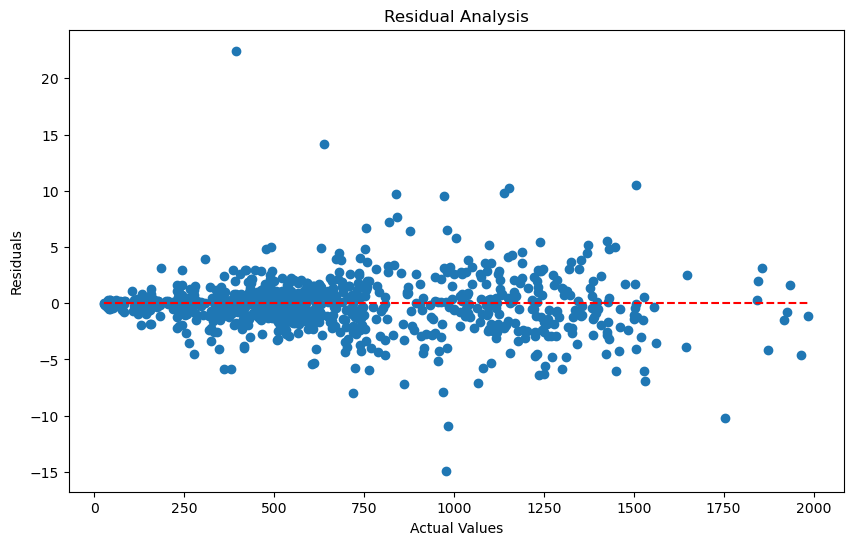

In [22]:
import matplotlib.pyplot as plt

# Calculate residuals
residuals = y_test - y_pred

# Plot residuals
plt.figure(figsize=(10, 6))
plt.scatter(y_test, residuals)
plt.hlines(y=0, xmin=y_test.min(), xmax=y_test.max(), colors='red', linestyles='dashed')
plt.xlabel('Actual Values')
plt.ylabel('Residuals')
plt.title('Residual Analysis')
plt.show()


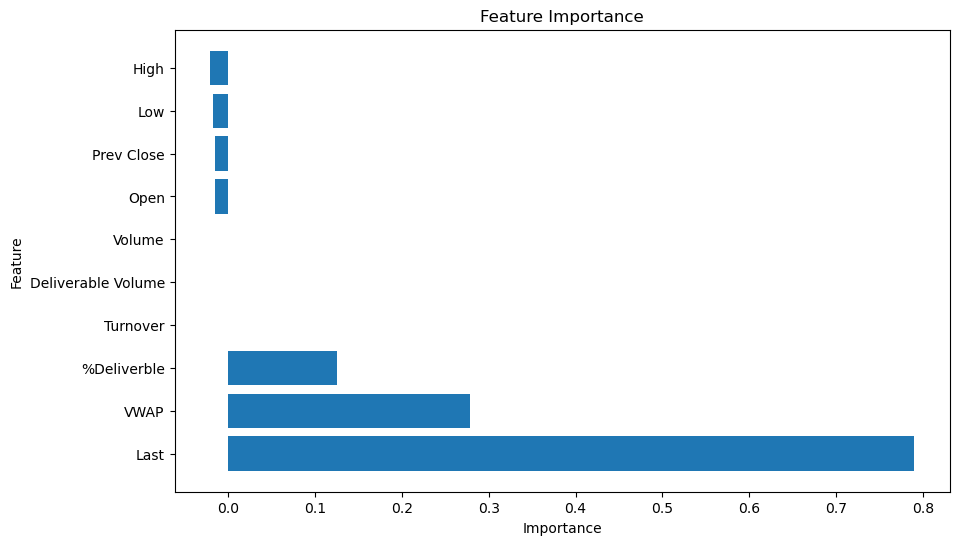

In [23]:
import numpy as np

# Get feature importance (coefficients)
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': model.coef_
})

# Sort by importance
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance['Feature'], feature_importance['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.show()


In [24]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation
cv_scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')

# Convert scores to positive and calculate mean
cv_mse = -cv_scores.mean()

print(f'Cross-Validated Mean Squared Error: {cv_mse}')


Cross-Validated Mean Squared Error: 6.171053278658819


In [25]:
# Get feature importance (coefficients)
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': model.coef_
})
print(feature_importance)

              Feature    Importance
0          Prev Close -1.527883e-02
1                Open -1.492352e-02
2                High -2.108682e-02
3                 Low -1.686343e-02
4                Last  7.898749e-01
5                VWAP  2.782836e-01
6              Volume -5.427643e-08
7            Turnover  1.354819e-15
8  Deliverable Volume -3.474381e-08
9         %Deliverble  1.255297e-01


In [27]:
# Save the model to a .pkl file
with open('stock_price_model.pkl', 'wb') as file:
    pickle.dump(model, file)

print("Model saved to stock_price_model.pkl")



Model saved to stock_price_model.pkl


In [31]:
import yfinance as yf

# Fetch the data for Tata Motors
ticker = "TATAMOTORS.NS"
data = yf.Ticker(ticker)
df = data.history(period="5d")

# Extract the required values
prev_close = df['Close'].iloc[0]
open_price = df['Open'].iloc[0]
high = df['High'].iloc[0]
low = df['Low'].iloc[0]
last = df['Close'].iloc[0]
vwap = (df['Volume'] * df['Close']).sum() / df['Volume'].sum()
volume = df['Volume'].iloc[0]

# Assuming Turnover and Deliverable Volume data is available from another source
# You would typically fetch this from another API or dataset
turnover = 300000000.0  # Example value
deliverable_volume = 1800000  # Example value
percent_deliverable = 90.0  # Example value

# Print the extracted values
print(f"Prev Close: {prev_close}")
print(f"Open: {open_price}")
print(f"High: {high}")
print(f"Low: {low}")
print(f"Last: {last}")
print(f"VWAP: {vwap}")
print(f"Volume: {volume}")
print(f"Turnover: {turnover}")
print(f"Deliverable Volume: {deliverable_volume}")
print(f"%Deliverable: {percent_deliverable}")


Prev Close: 1027.699951171875
Open: 997.7999877929688
High: 1034.25
Low: 995.1500244140625
Last: 1027.699951171875
VWAP: 1112.4185571375488
Volume: 11469098
Turnover: 300000000.0
Deliverable Volume: 1800000
%Deliverable: 90.0


In [32]:
import yfinance as yf

# Define the ticker symbol for Tata Motors
ticker_symbol = 'TATAMOTORS.NS'

# Fetch the ticker data
data = yf.Ticker(ticker_symbol)

# Get historical market data
historical_data = data.history(period='1d')

# Extract the close price
close_price = historical_data['Close'].iloc[0]
print(f"The close price of Tata Motors is: {close_price}")


The close price of Tata Motors is: 1161.8499755859375
